In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

from sklearn.linear_model import LinearRegression

### Reading data set from location

In [5]:
house_data = pd.read_csv('/Volumes/Work/COVENTRY/studies/7082_CEM_Bigdata_and_Data_Visualization/CW_7082/housing.csv')

In [6]:
house_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
from sklearn.datasets import fetch_california_housing

In [8]:
california_housing = fetch_california_housing()

In [9]:
from sklearn.datasets import fetch_openml
ames_housing = fetch_openml(name="house_prices", as_frame=True)

In [10]:
ames_housing.keys()


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [11]:
ames_housing.frame.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [12]:
california_housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [13]:
california_housing.target_names

['MedHouseVal']

In [14]:
print(california_housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [15]:
california_housing_df = pd.DataFrame(data= california_housing.data , columns=california_housing.feature_names)

In [16]:
california_housing_df.shape

(20640, 8)

In [17]:
california_housing_df['MedHouseVal'] = california_housing.target

In [18]:
california_housing_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [19]:
california_housing_df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## EDA

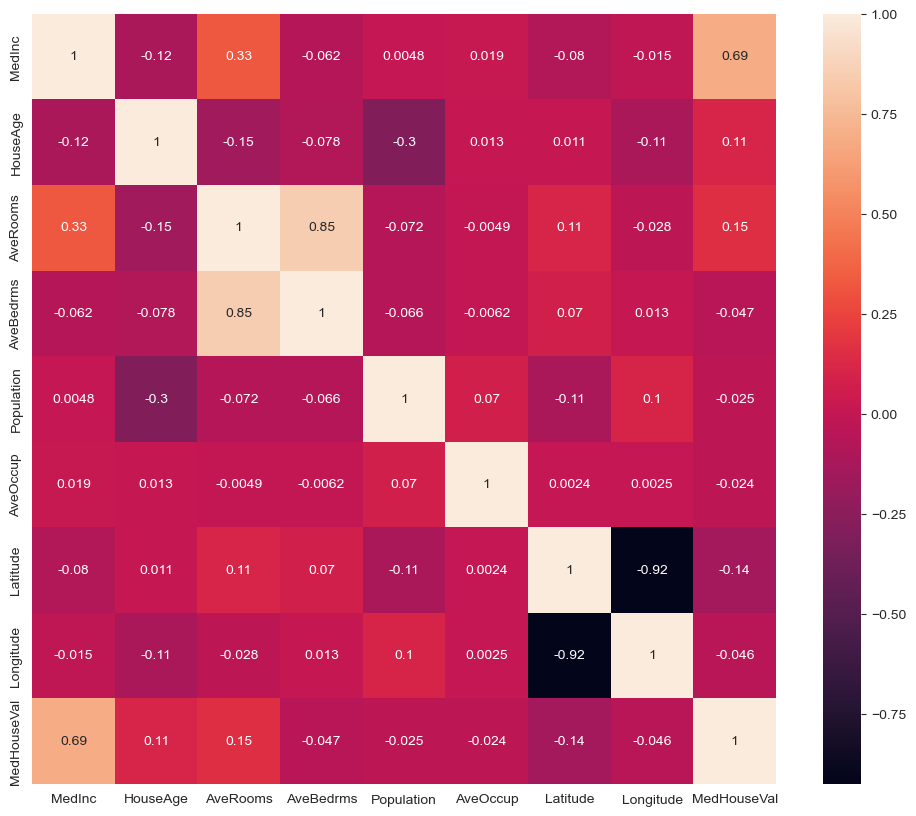

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(california_housing_df.corr(),annot=True)
plt.show()

#### According the correlation heatmap and values, it is evident that MedInc ( median income of the area) and AveRooms (Average rooms ) are correlated to the house price. Also, the heatmap shows the multi-colinearity between AveRooms and AveBedrms.On this scenario we will check the colinearity values using VIF of all columns to select best columns.
https://towardsdatascience.com/everything-you-need-to-know-about-multicollinearity-2f21f082d6dc


In [21]:
california_housing_vif = dict([(california_housing_df.columns[i],variance_inflation_factor(california_housing_df.values, i)) for i in range(len(california_housing_df.columns))])

In [22]:
california_housing_vif

{'MedInc': 19.62499781446958,
 'HouseAge': 7.59266269261016,
 'AveRooms': 47.9563513934456,
 'AveBedrms': 45.35819244757433,
 'Population': 2.936078279580856,
 'AveOccup': 1.0995301978289433,
 'Latitude': 568.497332024315,
 'Longitude': 640.0642113292109,
 'MedHouseVal': 9.28565865347653}

In [23]:
california_housing_vif_df = pd.DataFrame(data=california_housing_vif.items(),columns=['feature name','VIF Value'],)

In [24]:
california_housing_vif_df

,feature name,VIF Value
0,MedInc,19.624998
1,HouseAge,7.592663
2,AveRooms,47.956351
3,AveBedrms,45.358192
4,Population,2.936078
5,AveOccup,1.099530
6,Latitude,568.497332
7,Longitude,640.064211
8,MedHouseVal,9.285659


In [25]:
california_housing_vif_df.shape

(9, 2)

In [26]:
california_housing_updtd_df = california_housing_df.drop(columns=['AveRooms'],axis=0)

In [27]:
california_housing_updtd_df.head()

,MedInc,HouseAge,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,1.081081,565.0,2.181467,37.85,-122.25,3.422


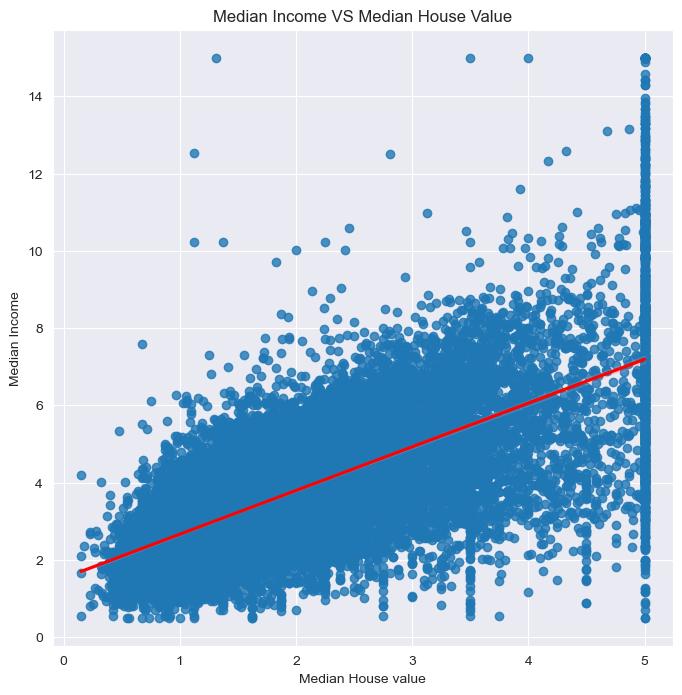

In [28]:
plt.figure(figsize=(8,8))
# sns.scatterplot(california_housing_updtd_df['MedHouseVal'],california_housing_updtd_df['MedInc'])
sns.regplot(data=california_housing_updtd_df,x='MedHouseVal',y='MedInc',line_kws={'color':"red"})
plt.title("Median Income VS Median House Value")
plt.ylabel("Median Income")
plt.xlabel("Median House value")
plt.show()

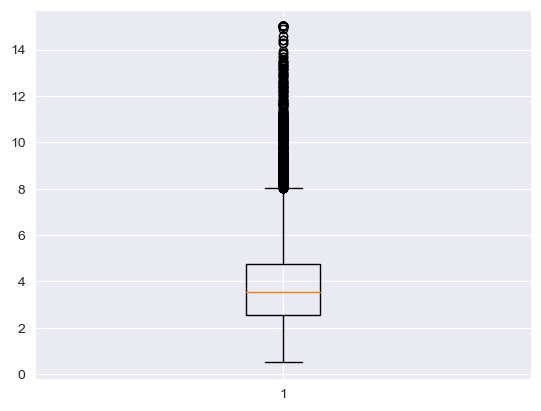

In [29]:
plt.boxplot(california_housing_updtd_df['MedInc']);

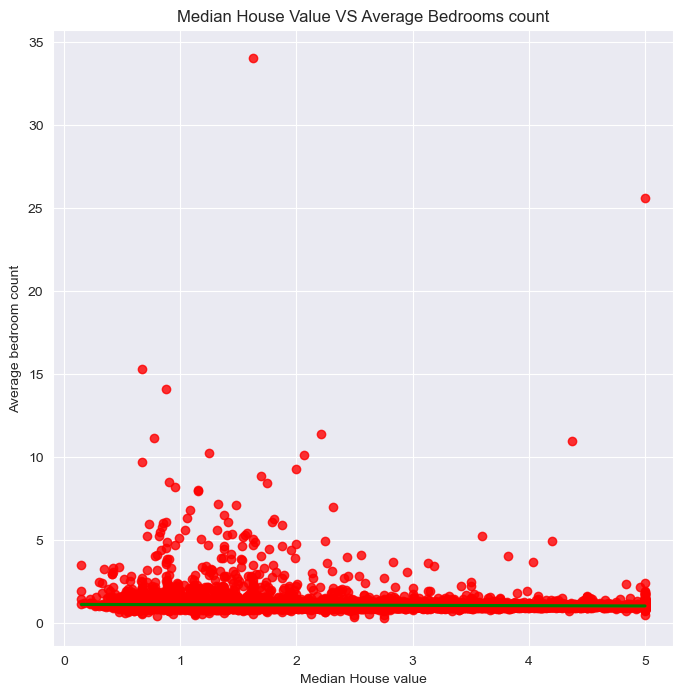

In [30]:
plt.figure(figsize=(8,8))
# sns.scatterplot(california_housing_updtd_df['MedHouseVal'],california_housing_updtd_df['AveBedrms'])
sns.regplot(data=california_housing_updtd_df,x='MedHouseVal',y='AveBedrms',color='red',line_kws={'color':'green'})
plt.title("Median House Value VS Average Bedrooms count")
plt.xlabel("Median House value")
plt.ylabel("Average bedroom count")
plt.show()

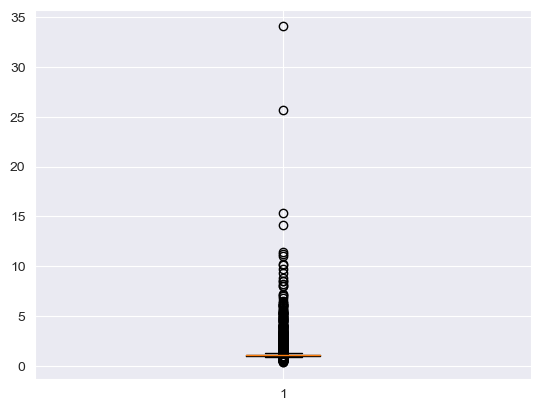

In [31]:
plt.boxplot(california_housing_updtd_df['AveBedrms']);

/Users/jitheshsunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


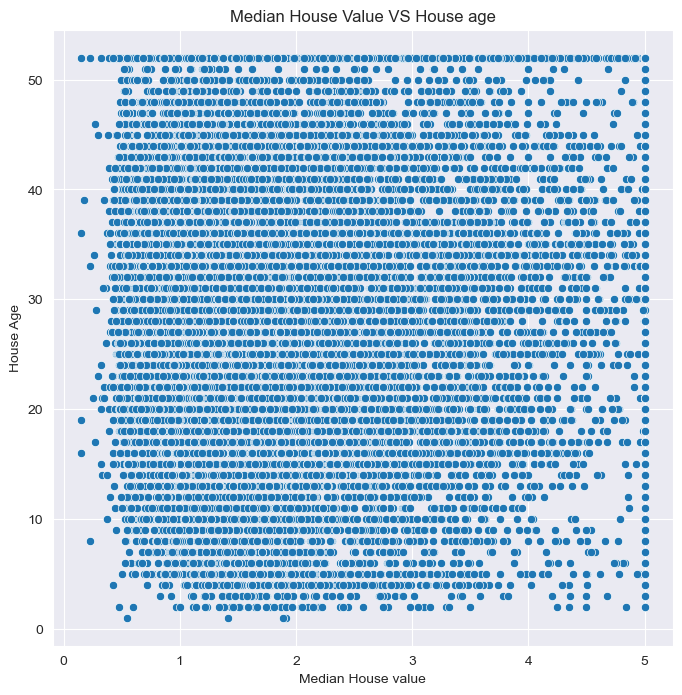

In [32]:
plt.figure(figsize=(8,8))
sns.scatterplot(california_housing_updtd_df['MedHouseVal'],california_housing_updtd_df['HouseAge'])
plt.title("Median House Value VS House age")
plt.xlabel("Median House value")
plt.ylabel("House Age")
plt.show()

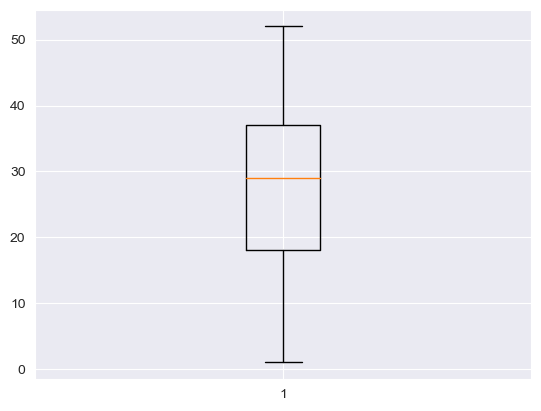

In [33]:
plt.boxplot(california_housing_updtd_df['HouseAge']);

### Now, we understood some idea about the dataset. ( ideas such as linearity, outliers, positive corelation with label column)

In [34]:
### selecting the dependent and independent columns.

X = california_housing_updtd_df.iloc[:,:-1]
y = california_housing_updtd_df.iloc[:,-1]

In [35]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [36]:
## Train test split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [37]:
# Using standardscalar to represent the columns in same metrics or same unit
std_scalar = StandardScaler()

In [38]:
X_train_scalar = std_scalar.fit_transform(X_train)
X_test_scalar =  std_scalar.transform(X_test)

### Model

In [42]:
## Linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scalar,y_train)

LinearRegression()

In [43]:
print(linear_reg.coef_)

[ 0.72615909  0.12622608  0.09521095  0.00237605 -0.03852054 -0.98823855
 -0.94505513]


In [44]:
print(linear_reg.intercept_)

2.0692396089424165


In [46]:
## Predicting test value
linear_reg_pred = linear_reg.predict(X_test_scalar)

In [125]:
linear_reg_pred[0]

0.717569519797727

/Users/jitheshsunny/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


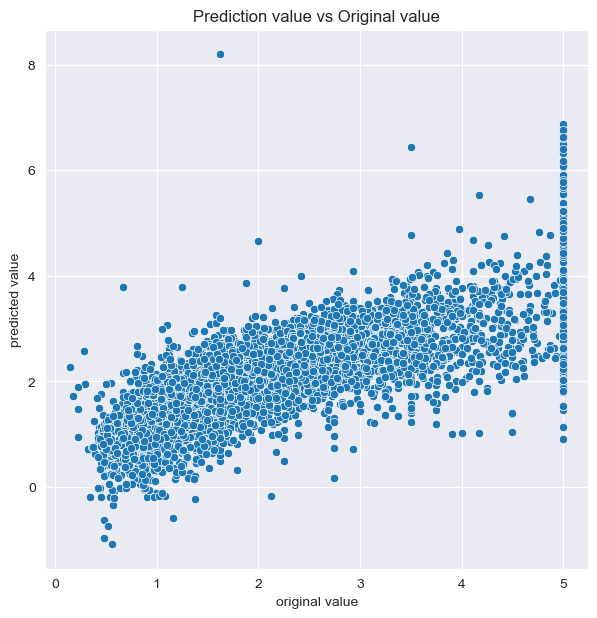

In [50]:
plt.figure(figsize=(7,7))
sns.scatterplot(y_test,linear_reg_pred)
plt.title('Prediction value vs Original value')
plt.ylabel("predicted value")
plt.xlabel("original value")
plt.show();


In [51]:
## the above plot shows a linear relation between predicted vlaues and original value. This seems good and our model preforms well.

In [56]:
## residuals and plot
residuals = y_test - linear_reg_pred
print(residuals.shape)

(6192,)


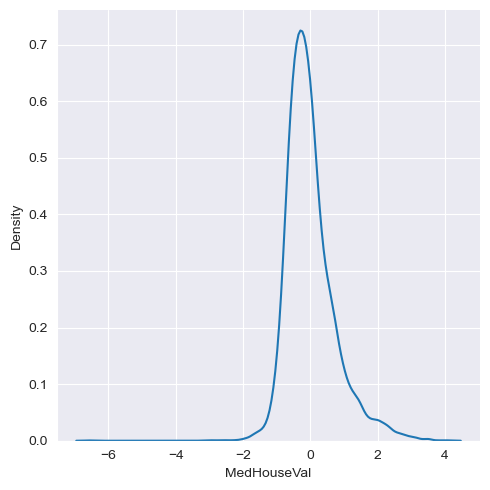

In [54]:
sns.displot(residuals,kind='kde')

In [57]:
## On +2 on the x axis, a bump has appeared which shows the impact of the outliers.

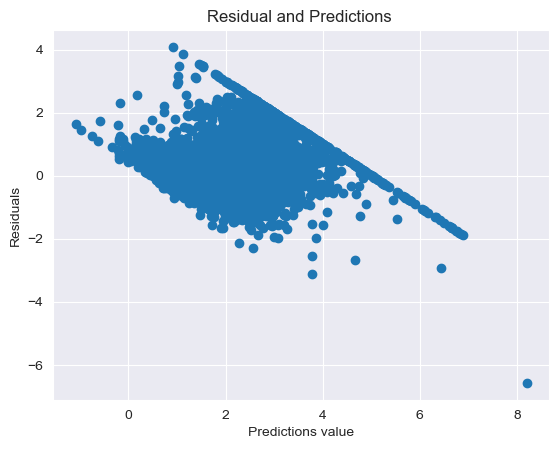

In [60]:
plt.scatter(linear_reg_pred,residuals)
plt.title("Residual and Predictions ")
plt.xlabel('Predictions value')
plt.ylabel("Residuals")
plt.show();

In [63]:
print(mean_absolute_error(y_test,linear_reg_pred))
print(mean_squared_error(y_test,linear_reg_pred))
print(np.sqrt(mean_squared_error(y_test,linear_reg_pred)))

0.534902222079847
0.5305540749343544
0.7283914297507587


In [66]:
score = r2_score(y_test,linear_reg_pred)

In [67]:
score

0.595780676128798

In [84]:
adj_r2_score = 1 - ((1-score)*(len(y_test)-1) / (len(y_test) -len(X_train)-1))

In [86]:
adj_r2_score

1.303078822100837

### Pickle the model
This pickle is used for deployment

In [94]:
import pickle

In [120]:
pickle.dump(linear_reg,open('california_house_lr_model.pkl','wb'))

In [121]:
pkl_obj= pickle.load(open('california_house_lr_model.pkl','rb'))

In [127]:
pkl_obj.predict(X_test_scalar[:1])

array([0.71756952])

In [128]:
pkl_obj.predict(X_test_scalar[:1]) == linear_reg_pred[0]

array([ True])